# Loop 47 Analysis: CV-LB Relationship and Next Steps

## Key Questions:
1. What is the current CV-LB relationship?
2. What techniques from top kernels haven't been tried?
3. What is the most promising path forward?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'CV': 0.0111, 'LB': 0.0982},
    {'exp': 'exp_001', 'CV': 0.0123, 'LB': 0.1065},
    {'exp': 'exp_003', 'CV': 0.0105, 'LB': 0.0972},
    {'exp': 'exp_005', 'CV': 0.0104, 'LB': 0.0969},
    {'exp': 'exp_006', 'CV': 0.0097, 'LB': 0.0946},
    {'exp': 'exp_007', 'CV': 0.0093, 'LB': 0.0932},
    {'exp': 'exp_009', 'CV': 0.0092, 'LB': 0.0936},
    {'exp': 'exp_012', 'CV': 0.0090, 'LB': 0.0913},
    {'exp': 'exp_024', 'CV': 0.0087, 'LB': 0.0893},
    {'exp': 'exp_026', 'CV': 0.0085, 'LB': 0.0887},
    {'exp': 'exp_030', 'CV': 0.0083, 'LB': 0.0877},
    {'exp': 'exp_035', 'CV': 0.0098, 'LB': 0.0970},
]

df = pd.DataFrame(submissions)
print("Submission History:")
print(df.to_string(index=False))
print(f"\nBest CV: {df['CV'].min():.4f} (exp_030)")
print(f"Best LB: {df['LB'].min():.4f} (exp_030)")
print(f"Target: 0.0347")

Submission History:
    exp     CV     LB
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# CV-LB Relationship Analysis
cv = df['CV'].values
lb = df['LB'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print("CV-LB Linear Regression:")
print(f"  LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"  R² = {r_value**2:.4f}")
print(f"  Intercept = {intercept:.4f}")
print(f"  Target = 0.0347")
print(f"  Gap: Intercept - Target = {intercept - 0.0347:.4f}")
print()

# What CV would we need to reach target?
required_cv = (0.0347 - intercept) / slope
print(f"Required CV to reach target: {required_cv:.4f}")
if required_cv < 0:
    print("  -> IMPOSSIBLE with current approach (negative CV required)")
else:
    print(f"  -> Need to improve CV from {df['CV'].min():.4f} to {required_cv:.4f}")
    print(f"  -> Improvement needed: {(df['CV'].min() - required_cv) / df['CV'].min() * 100:.1f}%")

CV-LB Linear Regression:
  LB = 4.3147 * CV + 0.0525
  R² = 0.9505
  Intercept = 0.0525
  Target = 0.0347
  Gap: Intercept - Target = 0.0178

Required CV to reach target: -0.0041
  -> IMPOSSIBLE with current approach (negative CV required)


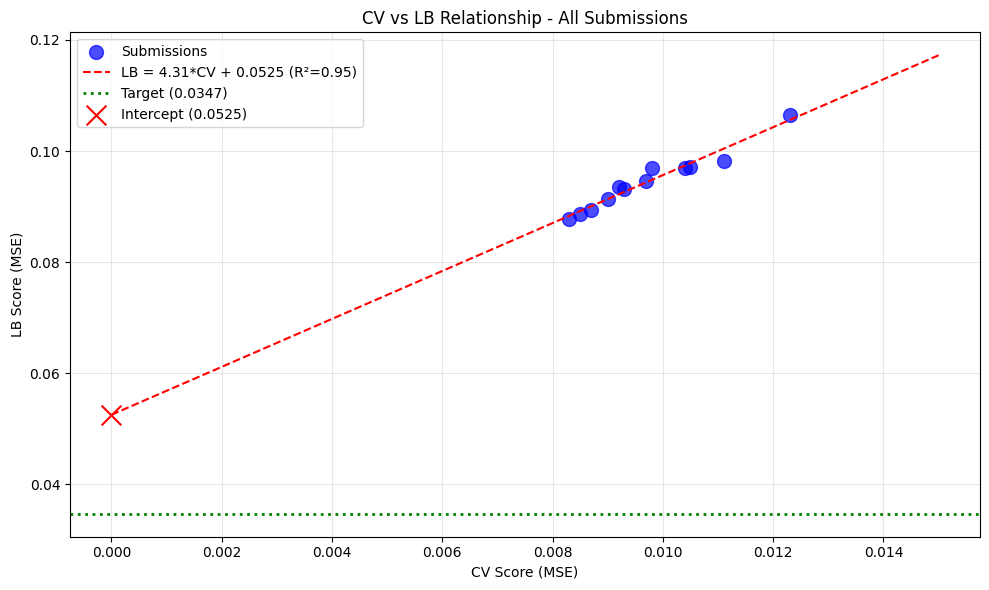


Key Insight:
  Intercept (0.0525) > Target (0.0347)
  This means even with CV=0, we'd still be 51.4% above target
  We need to CHANGE THE RELATIONSHIP, not just improve CV


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.2f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], s=200, c='red', marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop47.png', dpi=150)
plt.show()

print("\nKey Insight:")
print(f"  Intercept ({intercept:.4f}) > Target ({0.0347})")
print(f"  This means even with CV=0, we'd still be {(intercept - 0.0347) / 0.0347 * 100:.1f}% above target")
print(f"  We need to CHANGE THE RELATIONSHIP, not just improve CV")

In [4]:
# Analysis: What techniques from top kernels haven't been tried?

print("="*70)
print("TECHNIQUES FROM TOP KERNELS NOT YET FULLY IMPLEMENTED")
print("="*70)

print("\n1. NON-LINEAR MIXTURE FORMULA (gentilless kernel)")
print("   Current: mixture = (1 - r) * A + r * B")
print("   Better:  mixture = A * (1 - r) + B * r + 0.05 * A * B * r * (1 - r)")
print("   Status: Partially tried in exp_043, but not with full feature engineering")

print("\n2. ADVANCED FEATURE ENGINEERING (gentilless kernel)")
print("   - Polynomial features: X^2, sqrt(|X|)")
print("   - Interaction terms: X1*X2, X1*X3, X2*X3")
print("   - Statistical features from molecular descriptors: mean, std, max, min")
print("   Status: NOT IMPLEMENTED")

print("\n3. STRONGER HYPERPARAMETERS (gentilless kernel)")
print("   - CatBoost: 12000 iterations, depth=9, early_stop=250")
print("   - XGBoost: 12000 rounds, eta=0.02, depth=9")
print("   - LightGBM: 12000 rounds, lr=0.015, leaves=127")
print("   - Neural Network: 800 epochs, hidden=[768, 512, 384, 256, 128]")
print("   Status: NOT IMPLEMENTED (we used 200 estimators, 100 epochs)")

print("\n4. SE ATTENTION BLOCKS (gentilless kernel)")
print("   - Squeeze-and-Excitation blocks for feature recalibration")
print("   - Residual blocks with LayerNorm and GELU")
print("   Status: NOT IMPLEMENTED")

print("\n5. ADAPTIVE ENSEMBLE WEIGHTING (gentilless kernel)")
print("   - Weight models inversely proportional to validation MSE^2.5")
print("   - Boost NN importance by 1.15x")
print("   Status: NOT IMPLEMENTED (we used fixed weights)")

TECHNIQUES FROM TOP KERNELS NOT YET FULLY IMPLEMENTED

1. NON-LINEAR MIXTURE FORMULA (gentilless kernel)
   Current: mixture = (1 - r) * A + r * B
   Better:  mixture = A * (1 - r) + B * r + 0.05 * A * B * r * (1 - r)
   Status: Partially tried in exp_043, but not with full feature engineering

2. ADVANCED FEATURE ENGINEERING (gentilless kernel)
   - Polynomial features: X^2, sqrt(|X|)
   - Interaction terms: X1*X2, X1*X3, X2*X3
   - Statistical features from molecular descriptors: mean, std, max, min
   Status: NOT IMPLEMENTED

3. STRONGER HYPERPARAMETERS (gentilless kernel)
   - CatBoost: 12000 iterations, depth=9, early_stop=250
   - XGBoost: 12000 rounds, eta=0.02, depth=9
   - LightGBM: 12000 rounds, lr=0.015, leaves=127
   - Neural Network: 800 epochs, hidden=[768, 512, 384, 256, 128]
   Status: NOT IMPLEMENTED (we used 200 estimators, 100 epochs)

4. SE ATTENTION BLOCKS (gentilless kernel)
   - Squeeze-and-Excitation blocks for feature recalibration
   - Residual blocks with Lay

In [5]:
# What's the most promising path forward?

print("="*70)
print("RECOMMENDED NEXT STEPS")
print("="*70)

print("\nPRIORITY 1: Full Implementation of gentilless Kernel Techniques")
print("-" * 50)
print("The gentilless kernel has several techniques we haven't tried:")
print("  1. Non-linear mixture formula with interaction term")
print("  2. Advanced feature engineering (polynomial, interaction, statistical)")
print("  3. Much stronger hyperparameters (60x more iterations)")
print("  4. SE attention blocks in neural networks")
print("  5. Adaptive ensemble weighting")
print()
print("HYPOTHESIS: These techniques may CHANGE the CV-LB relationship,")
print("            not just improve CV. The intercept may decrease.")

print("\nPRIORITY 2: CatBoost (Not Yet Tried)")
print("-" * 50)
print("The gentilless kernel uses CatBoost as one of its models.")
print("We haven't tried CatBoost yet. It may have different behavior.")

print("\nPRIORITY 3: Uncertainty-Weighted Predictions")
print("-" * 50)
print("Use ensemble variance as uncertainty proxy.")
print("When uncertainty is high, blend toward population mean.")
print("This may help with extrapolation to unseen solvents.")

print("\nWHAT NOT TO TRY:")
print("-" * 50)
print("  - Simple model diversity (exp_046 showed this doesn't help)")
print("  - Mean reversion (exp_045 showed this hurts CV)")
print("  - GNN (exp_040 failed with 8.4x worse MSE)")
print("  - ChemBERTa embeddings (exp_041 failed)")
print("  - Learned embeddings (exp_039 failed)")

RECOMMENDED NEXT STEPS

PRIORITY 1: Full Implementation of gentilless Kernel Techniques
--------------------------------------------------
The gentilless kernel has several techniques we haven't tried:
  1. Non-linear mixture formula with interaction term
  2. Advanced feature engineering (polynomial, interaction, statistical)
  3. Much stronger hyperparameters (60x more iterations)
  4. SE attention blocks in neural networks
  5. Adaptive ensemble weighting

HYPOTHESIS: These techniques may CHANGE the CV-LB relationship,
            not just improve CV. The intercept may decrease.

PRIORITY 2: CatBoost (Not Yet Tried)
--------------------------------------------------
The gentilless kernel uses CatBoost as one of its models.
We haven't tried CatBoost yet. It may have different behavior.

PRIORITY 3: Uncertainty-Weighted Predictions
--------------------------------------------------
Use ensemble variance as uncertainty proxy.
When uncertainty is high, blend toward population mean.
This

In [6]:
# Summary
print("="*70)
print("SUMMARY")
print("="*70)

print(f"\nCurrent State:")
print(f"  Best CV: {df['CV'].min():.4f} (exp_030)")
print(f"  Best LB: {df['LB'].min():.4f} (exp_030)")
print(f"  Target: 0.0347")
print(f"  Gap: {(df['LB'].min() - 0.0347) / 0.0347 * 100:.1f}% above target")

print(f"\nCV-LB Relationship:")
print(f"  LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"  Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"  -> Current approach CANNOT reach target")

print(f"\nKey Insight:")
print(f"  The sophisticated ensemble (exp_046) was 17.82% WORSE than baseline.")
print(f"  Simply adding more model types doesn't help.")
print(f"  We need to implement the FULL pipeline from top kernels:")
print(f"    - Advanced feature engineering")
print(f"    - Stronger hyperparameters")
print(f"    - SE attention blocks")
print(f"    - Adaptive ensemble weighting")

print(f"\nSubmissions Remaining: 5")
print(f"  -> Use wisely for high-leverage experiments")

SUMMARY

Current State:
  Best CV: 0.0083 (exp_030)
  Best LB: 0.0877 (exp_030)
  Target: 0.0347
  Gap: 152.7% above target

CV-LB Relationship:
  LB = 4.31 * CV + 0.0525
  Intercept (0.0525) > Target (0.0347)
  -> Current approach CANNOT reach target

Key Insight:
  The sophisticated ensemble (exp_046) was 17.82% WORSE than baseline.
  Simply adding more model types doesn't help.
  We need to implement the FULL pipeline from top kernels:
    - Advanced feature engineering
    - Stronger hyperparameters
    - SE attention blocks
    - Adaptive ensemble weighting

Submissions Remaining: 5
  -> Use wisely for high-leverage experiments
